# IMDb Dataset Cleaning, Transforming, Enrichment

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')

Saving imdb_top_1000.csv to imdb_top_1000.csv
User uploaded file "imdb_top_1000.csv" with length 438096 bytes


In [3]:
df = pd.read_csv(file_name)

## Initial Dataset Overview

In [4]:
df.shape  # Rows and columns

(1000, 16)

In [5]:
df.head()  # First look at the data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
df.info()  # Column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.isnull().sum()[df.isnull().sum() > 0]  # Show only columns with nulls

,0
Certificate,101
Meta_score,157
Gross,169


In [8]:
df.describe() # Summary stats for numeric columns

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [9]:
df.nunique()  # Count unique values per column

,0
Poster_Link,1000
Series_Title,999
Released_Year,100
Certificate,16
Runtime,140
Genre,202
IMDB_Rating,17
Overview,1000
Meta_score,63
Director,548


In [10]:
df.duplicated().sum() # Check for full duplicate rows

0

## Cleaning and Transformation

### Dropped columns

In [11]:
# Drop column / no analytical value
df = df.drop(columns=['Poster_Link', 'Overview'])

### Series_Title

In [12]:
# Show duplicate titles
df[df['Series_Title'].duplicated(keep=False)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


### Released_Year

In [13]:
df['Released_Year'].value_counts()  # Frequency of values

,count
Released_Year,
2014,32
2004,31
2009,29
2013,28
2016,28
...,...
1926,1
1936,1
1924,1


In [14]:
df['Released_Year'].unique()  # List unique values

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [15]:
# df['Released_Year'].astype(str).str.len().value_counts()  # Detect digit years

In [16]:
# df[df['Released_Year'].astype(str).str.match(r'^\d{4}$') == False]  # See rows with invalid format

In [17]:
df[df['Released_Year'] == 'PG']  # Inspect invalid entry manually

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [18]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995  # Fix invalid value by imputing correct year (external knowledge)

In [19]:
# Convert column to integer and confirm new type
df['Released_Year'] = df['Released_Year'].astype(int)
df['Released_Year'].dtype

dtype('int64')

In [20]:
df['Released_Year'].isnull().sum()  # Confirm no new nulls

0

In [21]:
df['Released_Year'].describe()   # Summary stats

,Released_Year
count,1000.000000
mean,1991.221000
std,23.285669
min,1920.000000
25%,1976.000000
50%,1999.000000
75%,2009.000000
max,2020.000000


<Axes: >

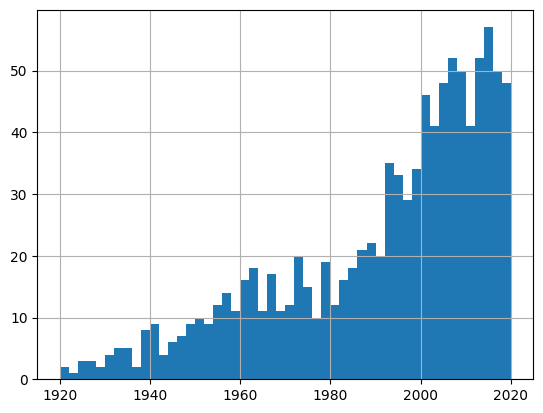

In [22]:
df['Released_Year'].hist(bins=50)  # Distribution

In [23]:
df['Decade'] = (df['Released_Year'] // 10) * 10  # Used for imputation of Gross

### Cerificate

In [24]:
# Mapping original certificate labels to broader categories
certificate_mapping = {
    'G': 'All Ages',
    'U': 'All Ages',
    'PG': 'Parental Guidance',
    'PG-13': 'Parental Guidance',
    'UA': 'Parental Guidance',
    'U/A': 'Parental Guidance',
    'GP': 'Parental Guidance',
    'TV-PG': 'Parental Guidance',
    'TV-14': 'Parental Guidance',
    'Approved': 'Parental Guidance',
    'Passed': 'Parental Guidance',
    'R': 'Restricted',
    'A': 'Restricted',
    'TV-MA': 'Restricted',
    '16': 'Restricted',
    'Unrated': 'Unknown',
    None: 'Unknown'
}

In [25]:
df['Certificate'].value_counts(dropna=False)  # Frequency incl. NaN

,count
Certificate,
U,234
A,197
UA,175
R,146
NaN,101
PG-13,43
PG,37
Passed,34
G,12


In [26]:
# Standardize label casing and spacing for consistency and count them to check
df['Certificate'] = df['Certificate'].str.strip().str.upper()
df['Certificate'].value_counts()

,count
Certificate,
U,234
A,197
UA,175
R,146
PG-13,43
PG,37
PASSED,34
G,12
APPROVED,11


In [27]:
# Map to new simplified categories and fill any unmapped values
df['Certificate_Clean'] = df['Certificate'].map(certificate_mapping)
df['Certificate_Clean'] = df['Certificate_Clean'].fillna('Unknown')

In [28]:
df['Certificate_Clean'].value_counts()  # Check new cleaned certificate categories

,count
Certificate_Clean,
Restricted,345
Parental Guidance,262
All Ages,246
Unknown,147


In [29]:
pd.crosstab(df['Certificate'], df['Certificate_Clean'])  # Validate the mapping

Certificate_Clean,All Ages,Parental Guidance,Restricted,Unknown
Certificate,,,,
16,0,0,1,0
A,0,0,197,0
APPROVED,0,0,0,11
G,12,0,0,0
GP,0,2,0,0
PASSED,0,0,0,34
PG,0,37,0,0
PG-13,0,43,0,0
R,0,0,146,0


### Runtime

In [30]:
df['Runtime'].unique()  # See all runtime formats

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [31]:
df['Runtime'].isnull().sum()  # Count nulls

0

In [32]:
df['Runtime'].str.contains('min', na=False).value_counts()  # Check if "min" is in all

,count
Runtime,
True,1000


In [33]:
# Remove "min" and convert to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

In [34]:
df['Runtime'].isnull().sum()  # Confirm no invalid conversions introduced nulls

0

In [35]:
df['Runtime'].describe()  # Distribution

,Runtime
count,1000.000000
mean,122.891000
std,28.093671
min,45.000000
25%,103.000000
50%,119.000000
75%,137.000000
max,321.000000


<Axes: >

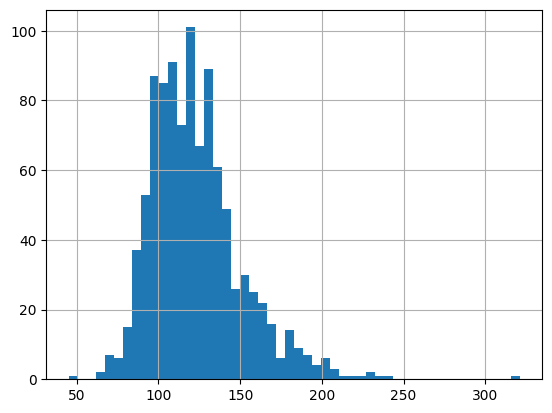

In [36]:
df['Runtime'].hist(bins=50)  # Visual distribution

### Genre

In [37]:
df['Genre'].value_counts()  # Check common genre combos

,count
Genre,
Drama,85
"Drama, Romance",37
"Comedy, Drama",35
"Comedy, Drama, Romance",31
"Action, Crime, Drama",30
...,...
"Adventure, Thriller",1
"Animation, Action, Sci-Fi",1
"Action, Crime, Comedy",1


In [38]:
df['Genre'].isnull().sum()  # Check for missing

0

In [39]:
df['Genre'].str.lower().str.strip().value_counts()  # Normalize and re-check

,count
Genre,
drama,85
"drama, romance",37
"comedy, drama",35
"comedy, drama, romance",31
"action, crime, drama",30
...,...
"adventure, thriller",1
"animation, action, sci-fi",1
"action, crime, comedy",1


In [40]:
df['Genre'].str.contains(r'\d', regex=True).sum()  # Check for numbers in genre

0

In [41]:
# Flatten all genre entries into a single list and count individual genre frequency
# Used for initial exploration and understanding genre distribution before cleaning/imputation.
all_genres = df['Genre'].str.split(', ')
flat_list = [genre for sublist in all_genres.dropna() for genre in sublist]
pd.Series(flat_list).value_counts()

,count
Drama,724
Comedy,233
Crime,209
Adventure,196
Action,189
Thriller,137
Romance,125
Biography,109
Mystery,99
Animation,82


In [42]:
pd.Series(flat_list).nunique()  # Count number of genres

21

### IMDb_Rating

In [43]:
df['IMDB_Rating'].isnull().sum()  # Check for missing

0

In [44]:
df['IMDB_Rating'].describe()  # Summary stats

,IMDB_Rating
count,1000.000000
mean,7.949300
std,0.275491
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.300000


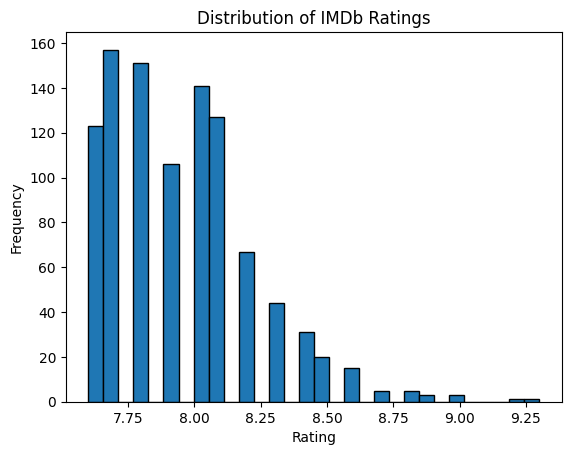

In [45]:
# View distribution
plt.hist(df['IMDB_Rating'], bins=30, edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

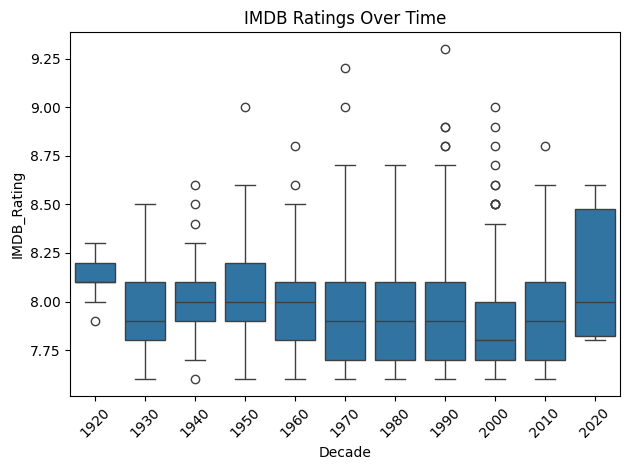

In [46]:
# View ratings over time
sns.boxplot(x='Decade', y='IMDB_Rating', data=df)
plt.title('IMDB Ratings Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Meta_score

In [47]:
df['Meta_score'].isnull().sum()  # Count missing

157

In [48]:
df['Meta_score'].describe()  # Summary stats

,Meta_score
count,843.000000
mean,77.971530
std,12.376099
min,28.000000
25%,70.000000
50%,79.000000
75%,87.000000
max,100.000000


In [49]:
df['Meta_score'].value_counts(dropna=False).head()  # Check most common values including NaNs

,count
Meta_score,
NaN,157
76.0,32
84.0,29
90.0,29
80.0,27


### Director

In [50]:
# Standardize director names (strip spaces and unify casing)
df['Director'] = df['Director'].str.strip().str.title()

In [51]:
# Check most frequent directors
df['Director'].value_counts().head(10)

,count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Stanley Kubrick,9
Billy Wilder,9
Woody Allen,9
Christopher Nolan,8


### Star1, Star2, Star3, Star4

In [52]:
# Standardize Star names (strip spaces and unify casing)
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    df[col] = df[col].str.strip().str.title()

### No_of_Votes

In [53]:
df['No_of_Votes'].describe()  # Summary stats

,No_of_Votes
count,1.000000e+03
mean,2.736929e+05
std,3.273727e+05
min,2.508800e+04
25%,5.552625e+04
50%,1.385485e+05
75%,3.741612e+05
max,2.343110e+06


<Axes: >

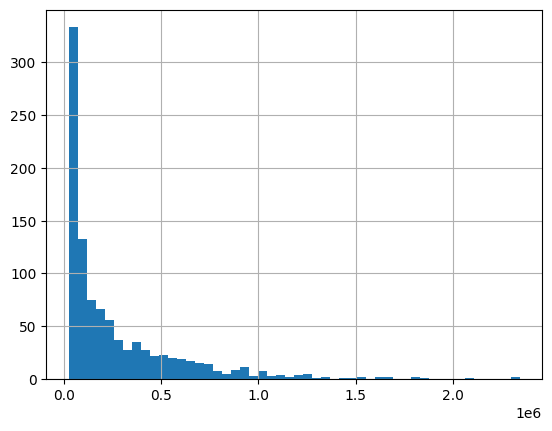

In [54]:
df['No_of_Votes'].hist(bins=50)  # Distribution

### Gross

In [55]:
# Remove commas and convert to float
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [56]:
df['Gross'].describe()  # Summary stats

,Gross
count,8.310000e+02
mean,6.803475e+07
std,1.097500e+08
min,1.305000e+03
25%,3.253559e+06
50%,2.353089e+07
75%,8.075089e+07
max,9.366622e+08


In [57]:
df['Gross'].isnull().sum()  # Count nulls

169

<Axes: >

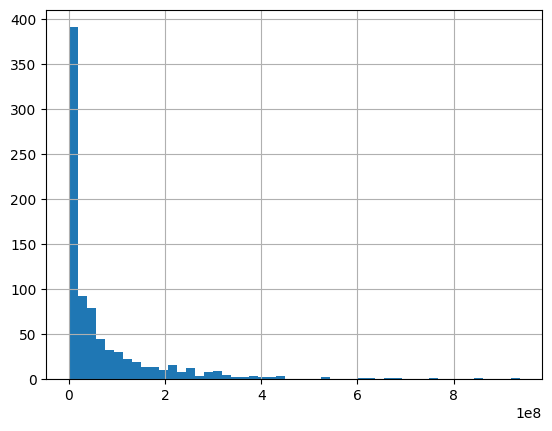

In [58]:
df['Gross'].hist(bins=50)  # Visual distribution

## Outlier Detection & Handling

### Outlier Detection

In [59]:
# Check correlation beforee outlier handling
df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Decade']].corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decade
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,-0.131040
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.342580
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.243714
Gross,0.095923,-0.030587,0.574393,1.000000,0.226777
Decade,-0.131040,-0.342580,0.243714,0.226777,1.000000


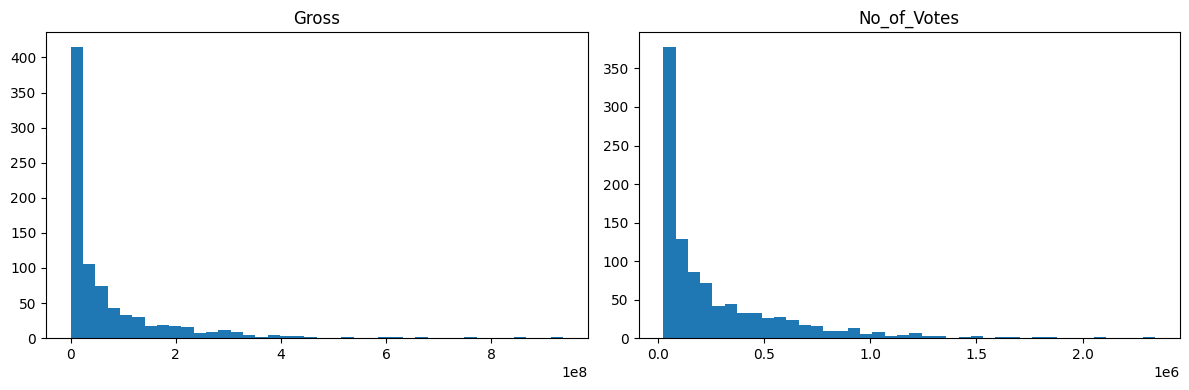

In [60]:
# Visualisation of Gross and No_of_Votes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df['Gross'].dropna(), bins=40)
axs[0].set_title('Gross')

axs[1].hist(df['No_of_Votes'].dropna(), bins=40)
axs[1].set_title('No_of_Votes')

plt.tight_layout()
plt.show()

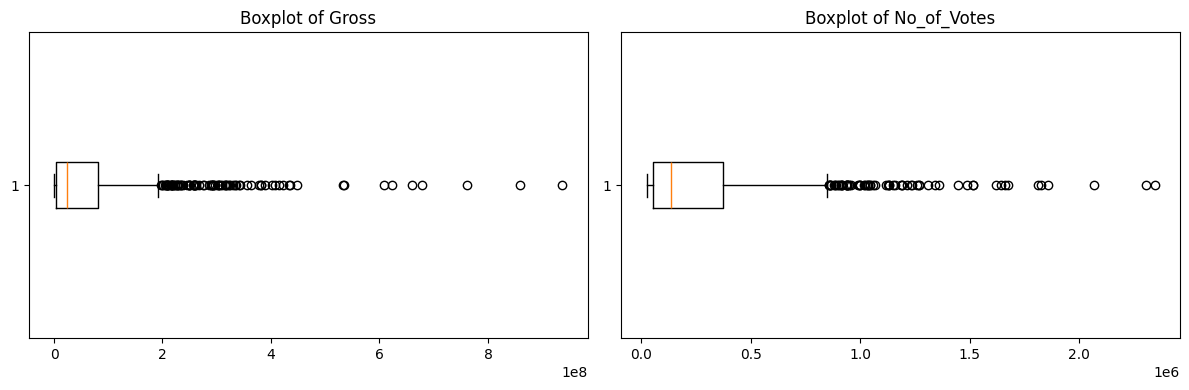

In [61]:
# Boxplot for outliers visualisation
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].boxplot(df['Gross'].dropna(), vert=False)
axs[0].set_title('Boxplot of Gross')
axs[1].boxplot(df['No_of_Votes'].dropna(), vert=False)
axs[1].set_title('Boxplot of No_of_Votes')
plt.tight_layout()
plt.show()

### Outlier Handling

In [62]:
# Outlier handling with log
df['Log_Votes'] = np.log1p(df['No_of_Votes'])
df['Log_Gross'] = np.log1p(df['Gross'])  # Nulls are present, recomputation necessary

In [63]:
# Check correlation after outlier handling
df[['IMDB_Rating', 'Meta_score', 'Log_Votes', 'Log_Gross', 'Decade']].corr()

,IMDB_Rating,Meta_score,Log_Votes,Log_Gross,Decade
IMDB_Rating,1.000000,0.268531,0.325238,-0.003570,-0.131040
Meta_score,0.268531,1.000000,-0.060017,-0.046115,-0.342580
Log_Votes,0.325238,-0.060017,1.000000,0.649416,0.298052
Log_Gross,-0.003570,-0.046115,0.649416,1.000000,0.208482
Decade,-0.131040,-0.342580,0.298052,0.208482,1.000000


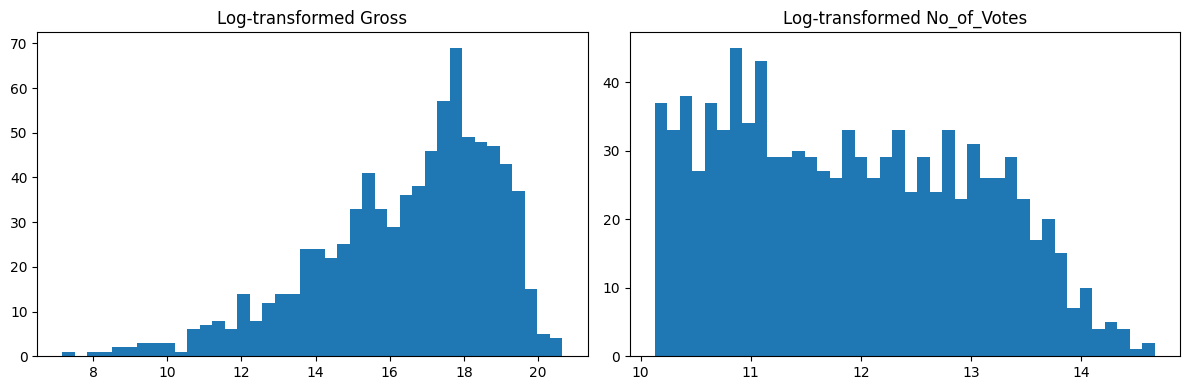

In [64]:
# Visualisation of Log_Gross and Log_Votes
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df['Log_Gross'].dropna(), bins=40)
axs[0].set_title('Log-transformed Gross')

axs[1].hist(df['Log_Votes'].dropna(), bins=40)
axs[1].set_title('Log-transformed No_of_Votes')

plt.tight_layout()
plt.show()

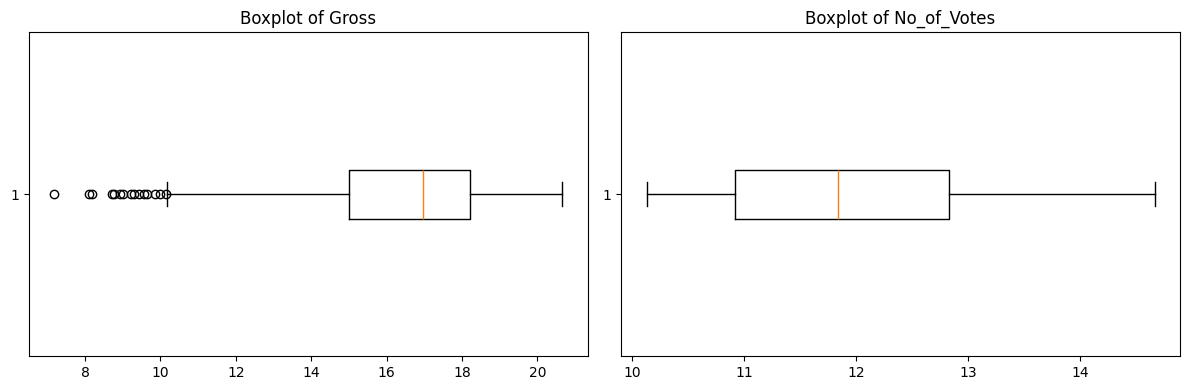

In [65]:
# Boxplot for visualisation after outlier handling
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].boxplot(df['Log_Gross'].dropna(), vert=False)
axs[0].set_title('Boxplot of Gross')
axs[1].boxplot(df['Log_Votes'].dropna(), vert=False)
axs[1].set_title('Boxplot of No_of_Votes')
plt.tight_layout()
plt.show()

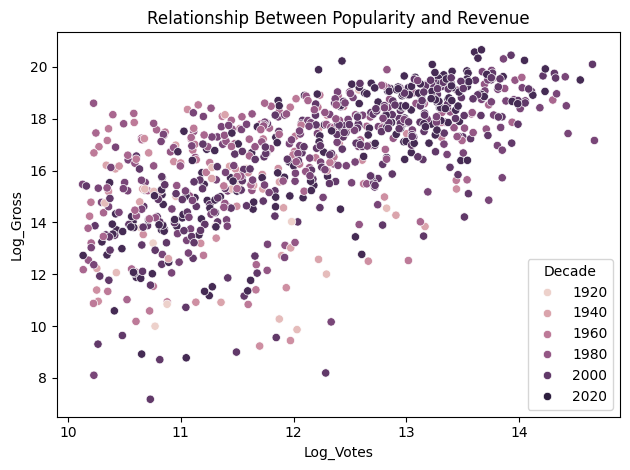

In [66]:
# Visualisation of relationship between popularity (based on number of votes) and gross
sns.scatterplot(data=df, x='Log_Votes', y='Log_Gross', hue='Decade')
plt.title('Relationship Between Popularity and Revenue')
plt.tight_layout()
plt.show()

## Genre-Based Imputation (Meta_score and Gross)

In [67]:
# Create a list column with genres
df['Genre_List'] = df['Genre'].str.split(', ')

# Count frequency of each genre
flat_list = [genre for sublist in df['Genre_List'].dropna() for genre in sublist]
genre_freq = pd.Series(flat_list).value_counts().to_dict()

# Helper to select most common genre for each movie
def most_common_genre(genre_list):
    if not isinstance(genre_list, list) or len(genre_list) == 0:
        return None
    return max(genre_list, key=lambda g: genre_freq.get(g, 0))

# Assign the most common genre per movie
df['Primary_Genre'] = df['Genre_List'].apply(most_common_genre)

In [68]:
# Create rating bins
rating_bins = [7.5, 8.0, 8.5, 9.0, 9.5]
rating_labels = ['7.5–8.0', '8.0–8.5', '8.5–9.0', '9.0–9.5']
df['Rating_Bin'] = pd.cut(df['IMDB_Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

In [69]:
# Use the log-transformed votes to create more even bins
df['Vote_Bin'] = pd.qcut(df['Log_Votes'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

In [70]:
# Impute missing Meta_score using group medians (genre and rating bin)
df['Meta_score'] = df.groupby(['Primary_Genre', 'Rating_Bin'])['Meta_score'].transform(lambda x: x.fillna(x.median()))
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())  # Fallback

<ipython-input-70-d3c7b142390f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Meta_score'] = df.groupby(['Primary_Genre', 'Rating_Bin'])['Meta_score'].transform(lambda x: x.fillna(x.median()))


In [71]:
# Impute missing Gross using group medians (decade and log-vote bin)
df['Gross'] = df.groupby(['Decade', 'Vote_Bin'])['Gross'].transform(lambda x: x.fillna(x.median()))
df['Gross'] = df['Gross'].fillna(df['Gross'].median())  # Fallback

<ipython-input-71-018f459827cb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Gross'] = df.groupby(['Decade', 'Vote_Bin'])['Gross'].transform(lambda x: x.fillna(x.median()))


In [72]:
# Log_Gross recomputation after imputation
df['Log_Gross'] = np.log1p(df['Gross'])

In [73]:
# Check correlation after recomputation of Log_Gross
df[['IMDB_Rating', 'Meta_score', 'Log_Votes', 'Log_Gross', 'Decade']].corr()

,IMDB_Rating,Meta_score,Log_Votes,Log_Gross,Decade
IMDB_Rating,1.000000,0.285451,0.325238,-0.004753,-0.131040
Meta_score,0.285451,1.000000,-0.081809,-0.074980,-0.289382
Log_Votes,0.325238,-0.081809,1.000000,0.656883,0.298052
Log_Gross,-0.004753,-0.074980,0.656883,1.000000,0.195694
Decade,-0.131040,-0.289382,0.298052,0.195694,1.000000


## Enrichment

### Rating_Diff

In [74]:
# Calculate the difference between IMDb user rating (0–10) and normalized Meta_score (converted from 0–100 to 0–10)
df['Rating_Diff'] = df['IMDB_Rating'] - (df['Meta_score'] / 10)

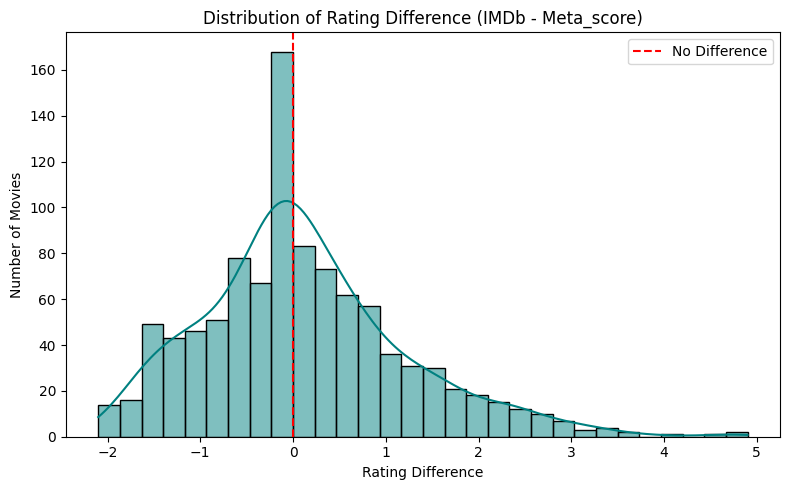

In [75]:
# Distribution of the rating difference to identify alignment/divergence between critic and user ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating_Diff'], bins=30, kde=True, color='teal')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.title('Distribution of Rating Difference (IMDb - Meta_score)')
plt.xlabel('Rating Difference')
plt.ylabel('Number of Movies')
plt.legend()
plt.tight_layout()
plt.show()

### Genre One-Hot

In [76]:
# One-hot encode all individual genres
genre_dummies = df['Genre_List'].explode().str.get_dummies().groupby(level=0).sum()

# Rename columns with prefix for clarity
genre_dummies.columns = [f'Genre_{col}' for col in genre_dummies.columns]

# Concatenate one-hot genre columns to df
df = pd.concat([df, genre_dummies], axis=1)

In [77]:
# Explode the genres so each genre appears in a separate row
exploded = df[['Decade', 'IMDB_Rating', 'Genre_List']].explode('Genre_List')

# Create pivot table
genre_rating_pivot = exploded.pivot_table(
    index='Decade',
    columns='Genre_List',
    values='IMDB_Rating',
    aggfunc='mean'
)

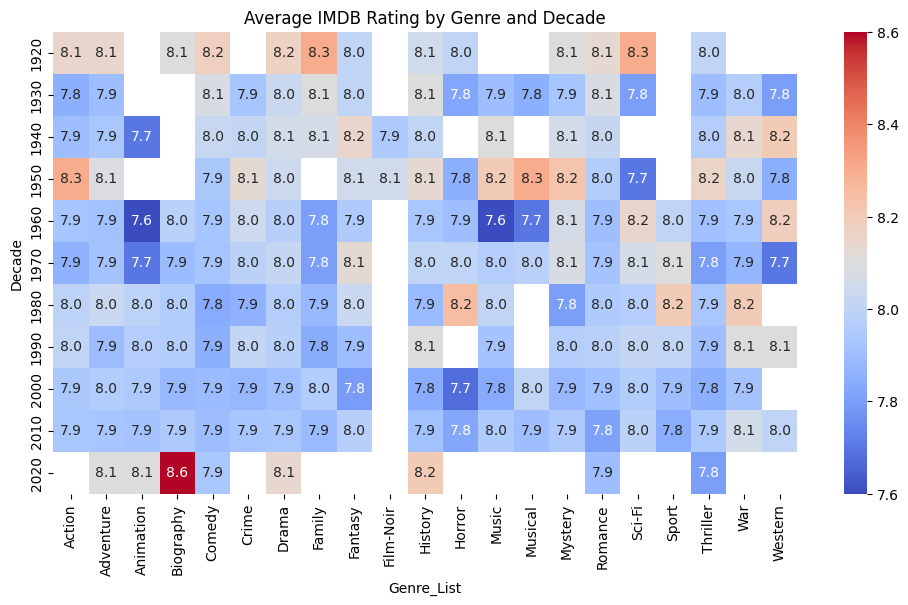

In [78]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(genre_rating_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average IMDB Rating by Genre and Decade')
plt.show()

### Star Frequency

In [79]:
# Combine and flatten star columns
unique_stars = pd.unique(df[['Star1', 'Star2', 'Star3', 'Star4']].values.ravel())
len(unique_stars)

2709

In [80]:
# Flatten and count
all_stars = df[['Star1', 'Star2', 'Star3', 'Star4']].values.flatten()
star_counts = Counter(all_stars)

In [81]:
# Map frequency of each actor (based on their total appearances in all four star columns)
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    df[f'{col}_Freq'] = df[col].map(star_counts)

# Average frequency per movie
df['Avg_Star_Freq'] = df[['Star1_Freq', 'Star2_Freq', 'Star3_Freq', 'Star4_Freq']].mean(axis=1)

In [82]:
# Evaluate how star frequency relates to ratings, popularity, and revenue
df[['Avg_Star_Freq', 'Log_Gross', 'IMDB_Rating', 'Meta_score', 'Log_Votes']].corr()

,Avg_Star_Freq,Log_Gross,IMDB_Rating,Meta_score,Log_Votes
Avg_Star_Freq,1.000000,0.395947,0.114905,-0.054102,0.454324
Log_Gross,0.395947,1.000000,-0.004753,-0.074980,0.656883
IMDB_Rating,0.114905,-0.004753,1.000000,0.285451,0.325238
Meta_score,-0.054102,-0.074980,0.285451,1.000000,-0.081809
Log_Votes,0.454324,0.656883,0.325238,-0.081809,1.000000


<Axes: xlabel='Avg_Star_Freq', ylabel='Gross'>

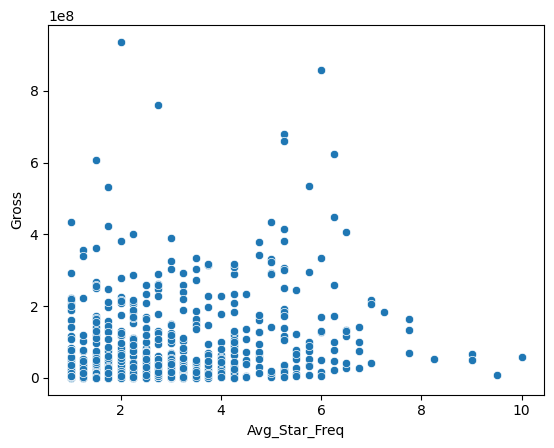

In [83]:
# Visualize raw relationship between average star frequency and gross revenue
sns.scatterplot(data=df, x='Avg_Star_Freq', y='Gross')

<Axes: xlabel='Avg_Star_Freq', ylabel='Log_Gross'>

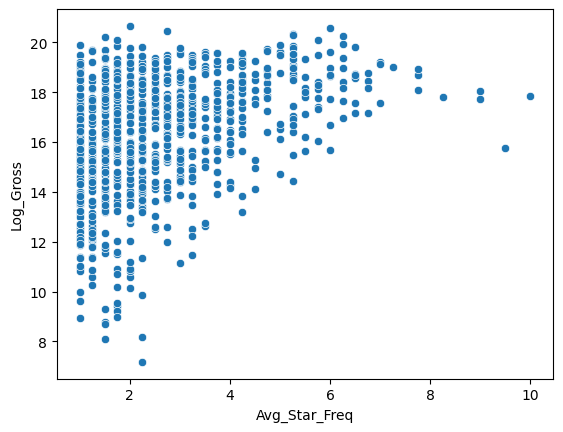

In [84]:
# Visualize relationship with log-transformed gross (due to skewness)
sns.scatterplot(data=df, x='Avg_Star_Freq', y='Log_Gross')

## Clean-up

In [85]:
# Round numeric features for readability
df[['Rating_Diff', 'Log_Votes', 'Log_Gross']] = df[['Rating_Diff', 'Log_Votes', 'Log_Gross']].round(3)

In [86]:
# Columns no longer needed
df = df.drop(columns=[
    'Certificate',  # Replaced by Certificate_Clean
    'Genre_List',  # Intermediate used for one-hot
    'Genre',  # Replaced by Genre One-Hot
    'Primary_Genre',  # Only used for imputation
    'Vote_Bin', 'Rating_Bin',  # Intermediate used for imputation
    'Star1_Freq', 'Star2_Freq', 'Star3_Freq', 'Star4_Freq'  # Intermediate enrichment
])

In [87]:
# Reorder columns
ordered_cols = [
    'Series_Title', 'Released_Year', 'Decade',
    'Certificate_Clean', 'Runtime',
    'IMDB_Rating', 'Meta_score', 'Rating_Diff',
    'No_of_Votes', 'Log_Votes',
    'Gross', 'Log_Gross',
    'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Avg_Star_Freq'
]

# Get one-hot genre columns sorted by frequency using existing genre_freq
genre_cols = sorted(
    [col for col in df.columns if col.startswith('Genre_')],
    key=lambda x: genre_freq.get(x.replace('Genre_', ''), 0),
    reverse=True  # Most frequent first
)
final_cols = ordered_cols + genre_cols

# Assign new order
df = df[final_cols]

## Final Overview

In [88]:
df.info()  # Column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       1000 non-null   object 
 1   Released_Year      1000 non-null   int64  
 2   Decade             1000 non-null   int64  
 3   Certificate_Clean  1000 non-null   object 
 4   Runtime            1000 non-null   int64  
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         1000 non-null   float64
 7   Rating_Diff        1000 non-null   float64
 8   No_of_Votes        1000 non-null   int64  
 9   Log_Votes          1000 non-null   float64
 10  Gross              1000 non-null   float64
 11  Log_Gross          1000 non-null   float64
 12  Director           1000 non-null   object 
 13  Star1              1000 non-null   object 
 14  Star2              1000 non-null   object 
 15  Star3              1000 non-null   object 
 16  Star4              1000 n

In [89]:
df.head()  # Overview of cleaned dataset

,Series_Title,Released_Year,Decade,Certificate_Clean,Runtime,IMDB_Rating,Meta_score,Rating_Diff,No_of_Votes,Log_Votes,...,Genre_Fantasy,Genre_Family,Genre_History,Genre_War,Genre_Music,Genre_Horror,Genre_Western,Genre_Film-Noir,Genre_Sport,Genre_Musical
0,The Shawshank Redemption,1994,1990,Restricted,142,9.3,80.0,1.3,2343110,14.667,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,1970,Restricted,175,9.2,100.0,-0.8,1620367,14.298,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,2000,Parental Guidance,152,9.0,84.0,0.6,2303232,14.650,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,1970,Restricted,202,9.0,90.0,0.0,1129952,13.938,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,1950,All Ages,96,9.0,96.0,-0.6,689845,13.444,...,0,0,0,0,0,0,0,0,0,0


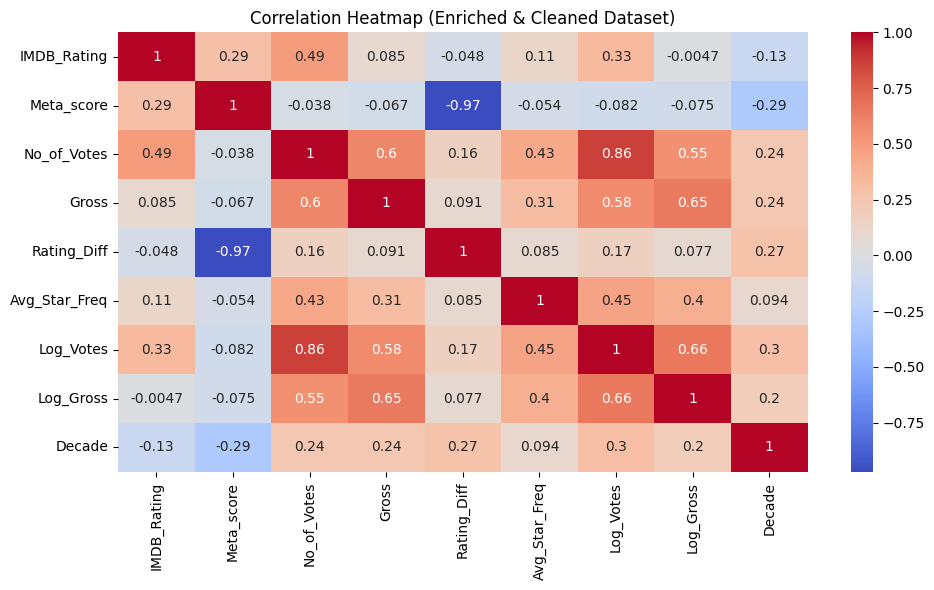

In [90]:
# Overview correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Rating_Diff', 'Avg_Star_Freq', 'Log_Votes', 'Log_Gross', 'Decade']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Enriched & Cleaned Dataset)')
plt.tight_layout()
plt.show()

In [91]:
# Export Cleaned Dataset
df.to_csv('cleaned_imdb.csv', index=False)